In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\imarticus\EDA Practise\telecom_churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df.columns()

TypeError: 'Index' object is not callable

what is the proportion of churned users in our dataframe?

#Churn : the percentage of subscribers who end their contract or subscription with a telecom company within a specific time period

In [ ]:
df['Churn'].replace({True:1,False:0},inplace=True)

In [ ]:
df['Churn'].value_counts()

In [ ]:
df['Churn'].value_counts(normalize=True)

In [ ]:
14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

In [ ]:
What are average values of numerical features for churned users?

In [17]:
df[df['Churn']==1].mean(numeric_only=True)

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [ ]:
How much time (on average) do churned users spend on the phone during daytime?

In [18]:
df[df['Churn']==1]['Total day minutes'].mean()

206.91407867494823

In [ ]:
What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

In [19]:
df[(df['International plan']=='No') & (df['Churn']==0)]['Total intl minutes'].max()

18.9

In [ ]:
How do the usage patterns (day, evening, night, and international minutes) differ between customers who churn and those who do not?

In [9]:
churned=df[df['Churn']==1]
non_churned=df[df['Churn']==0]
usage_parameters=['Total day minutes','Total eve minutes','Total night minutes']
avg_usage_churned=churned[usage_parameters].mean()
avg_usage_non_churned=non_churned[usage_parameters].mean()

In [23]:
average_usage = pd.DataFrame({'Churned' : avg_usage_churned,'Non_Churned' : avg_usage_non_churned })
average_usage

,Churned,Non_Churned
Total day minutes,206.914079,175.175754
Total eve minutes,212.410145,199.043298
Total night minutes,205.231677,200.133193


<Axes: >

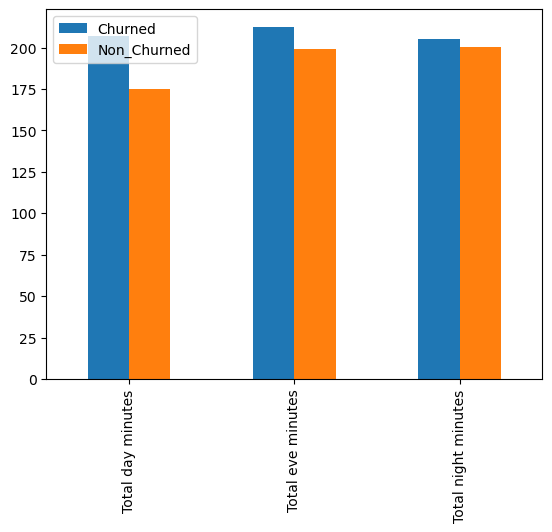

In [24]:
average_usage.plot(kind = 'bar')

In [25]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Are there any notable differences in the number of customer service calls between churned and 
non-churned customers?

In [28]:
df.groupby (df['Churn'])['Customer service calls'].sum()

Churn
0    4132
1    1077
Name: Customer service calls, dtype: int64

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
avg_calls_churned=churned['Customer service calls'].mean()
avg_calls_non_churned=non_churned['Customer service calls'].mean()

In [11]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(churned['Customer service calls'],non_churned['Customer service calls'])
t_stat,p_value

(12.319375496769158, 3.900360240189117e-34)

In [15]:
alpha = 0.05
# Print the results
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')
if p_value < alpha:
    print(f'Reject the null hypothesis: There is a significant difference in the number of customer service calls between churned and non-churned customers (p-value = {p_value}).')
else:
    print(f'Fail to reject the null hypothesis: There is no significant difference in the number of customer service calls between churned and non-churned customers (p-value = {p_value}).'

SyntaxError: incomplete input (1392154051.py, line 7)

In [ ]:
What percentage of customers have an international plan? How does having an 
international plan affect churn rate?

In [16]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [39]:
cust_with_int_plans=df[df['International plan']=='Yes']
total_cust=len(df['International plan'])
percent__int_plans=len(cust_with_int_plans)/total_cust*100

print(percent__int_plans)

9.69096909690969


Churn rate for customers with an international plan: 42.41%
Churn rate for customers without an international plan: 11.50%


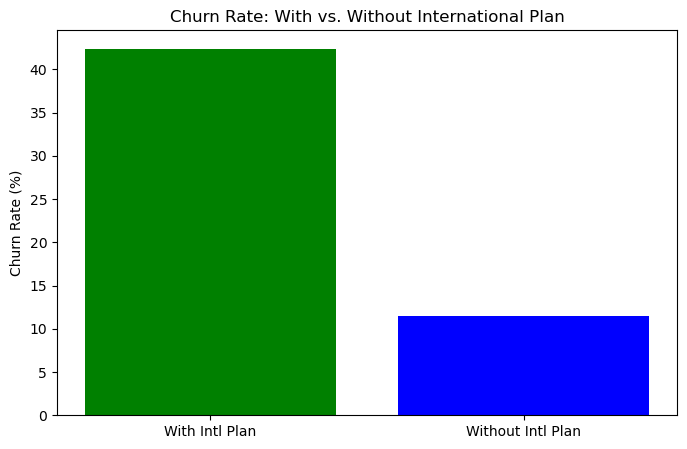

In [40]:
# Calculate churn rates
churn_rate_with_intl_plan = cust_with_int_plans['Churn'].mean() * 100
churn_rate_without_intl_plan = df[df['International plan'] == 'No']['Churn'].mean() * 100

print(f'Churn rate for customers with an international plan: {churn_rate_with_intl_plan:.2f}%')
print(f'Churn rate for customers without an international plan: {churn_rate_without_intl_plan:.2f}%')

# Visualize the churn rates
labels = ['With Intl Plan', 'Without Intl Plan']
churn_rates = [churn_rate_with_intl_plan, churn_rate_without_intl_plan]

plt.figure(figsize=(8, 5))
plt.bar(labels, churn_rates, color=['green', 'blue'])
plt.title('Churn Rate: With vs. Without International Plan')
plt.ylabel('Churn Rate (%)')
plt.show()

In [ ]:
How does the churn rate compare between customers with and without a voice mail plan?


Churn rate for customers with an voice plan: 8.68%
Churn rate for customers without an voice plan: 16.72%


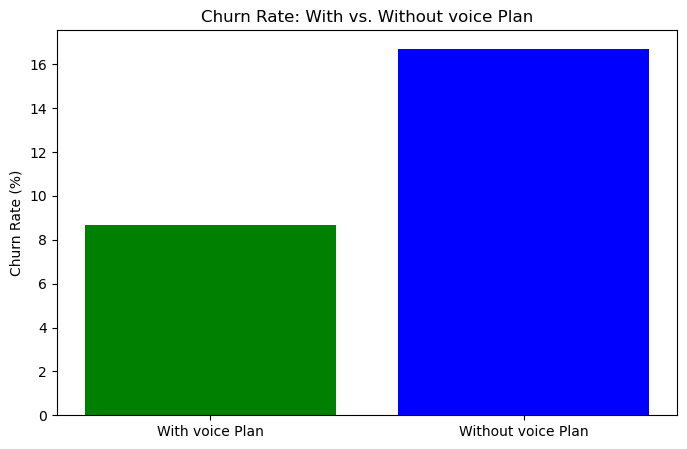

In [42]:
cust_with_voice_plans=df[df['Voice mail plan']=='Yes']
cust_without_voice_plans=df[df['Voice mail plan']=='No']

churn_rate_with_voice_plan=cust_with_voice_plans['Churn'].mean()*100
churn_rate_without_voice_plan=cust_without_voice_plans['Churn'].mean()*100
print(f'Churn rate for customers with an voice plan: {churn_rate_with_voice_plan:.2f}%')
print(f'Churn rate for customers without an voice plan: {churn_rate_without_voice_plan:.2f}%')


labels = ['With voice Plan', 'Without voice Plan']
churn_rates = [churn_rate_with_voice_plan, churn_rate_without_voice_plan]

plt.figure(figsize=(8, 5))
plt.bar(labels, churn_rates, color=['green', 'blue'])
plt.title('Churn Rate: With vs. Without voice Plan')
plt.ylabel('Churn Rate (%)')
plt.show()

In [ ]:
What are the average Number vmail messages for customers with a voice mail plan compared to those without?

In [43]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Average number of voice mail messages for customers with a voice mail plan: 29.28
Average number of voice mail messages for customers without a voice mail plan: 0.00


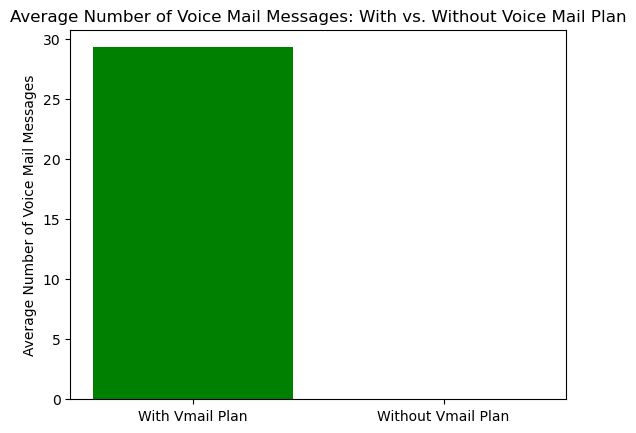

In [48]:
avg_vmail_for_voice_mail=cust_with_voice_plans['Number vmail messages'].mean()
avg_vmail_for_without_voice_mail=cust_without_voice_plans['Number vmail messages'].mean()

print(f'Average number of voice mail messages for customers with a voice mail plan: {avg_vmail_for_voice_mail:.2f}')
print(f'Average number of voice mail messages for customers without a voice mail plan: {avg_vmail_for_without_voice_mail:.2f}')
# Visualize the average number of voice mail messages
labels = ['With Vmail Plan', 'Without Vmail Plan']
avg_vmail_messages = [avg_vmail_for_voice_mail,avg_vmail_for_without_voice_mail]

plt.bar(labels, avg_vmail_messages, color=['green', 'blue'])
plt.title('Average Number of Voice Mail Messages: With vs. Without Voice Mail Plan')
plt.ylabel('Average Number of Voice Mail Messages')
plt.show()